In [1]:
# Install a pip package in the current Jupyter kernel - https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
import sys
!{sys.executable} -m pip install matplotlib numpy
sys.path.append('.')
import plotUtil


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


Plot the "number of times during a run that a new class champion was the offspring of a champion of another class" (orig. innovations engine paper: http://dx.doi.org/10.1145/2739480.2754703

In [4]:
import json
#json_file_path = '/Users/bthj/QD/conf-duration_delta_pitch_combinations/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_thrshld_0.5_1685973719958.json'
# json_file_path = '/Users/bthj/QD/conf-static_mutation_rate_combinations/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_thrshld_0.5_1685973723978.json'
json_file_path = '/Users/bjornpjo/QD-Fox/conf-duration_delta_pitch_combinations-singleCellWin/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_1693252236608.json'
x_multiplier = 1000  # Set this value as the step size in the JSON file name
title = "goalSwitches: " + json_file_path.split('/')[4]

# Read data from JSON file
data = plotUtil.read_data_from_json(json_file_path)

Plot the average champion count and goal switch count, across all cells.

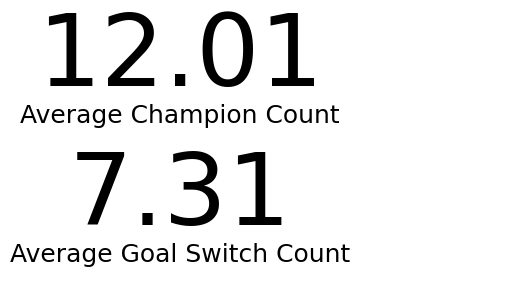

In [13]:
average_champion_count = data['evoRuns'][0]['iterations'][0]['goalSwitches']['averageChampionCount']
average_goal_switch_count = data['evoRuns'][0]['iterations'][0]['goalSwitches']['averageGoalSwitchCount']

import matplotlib.pyplot as plt

def plot_numbers_with_labels(number1, label1, number2, label2):
    fig, ax = plt.subplots(figsize=(6, 3))  # Adjust the figure size as per your preference

    ax.text(0.3, 0.95, '{:.2f}'.format(number1), fontsize=72, ha='center', va='center')
    ax.text(0.3, 0.70, label1, fontsize=18, ha='center', va='center', transform=ax.transAxes)

    ax.text(0.3, 0.35, '{:.2f}'.format(number2), fontsize=72, ha='center', va='center')
    ax.text(0.3, 0.1, label2, fontsize=18, ha='center', va='center', transform=ax.transAxes)

    ax.axis('off')  # Hide the axis

    plt.show()

plot_numbers_with_labels(average_champion_count, "Average Champion Count", average_goal_switch_count, "Average Goal Switch Count")


**For all evoruns**: plot the average champion count and goal switch count, across all cells.

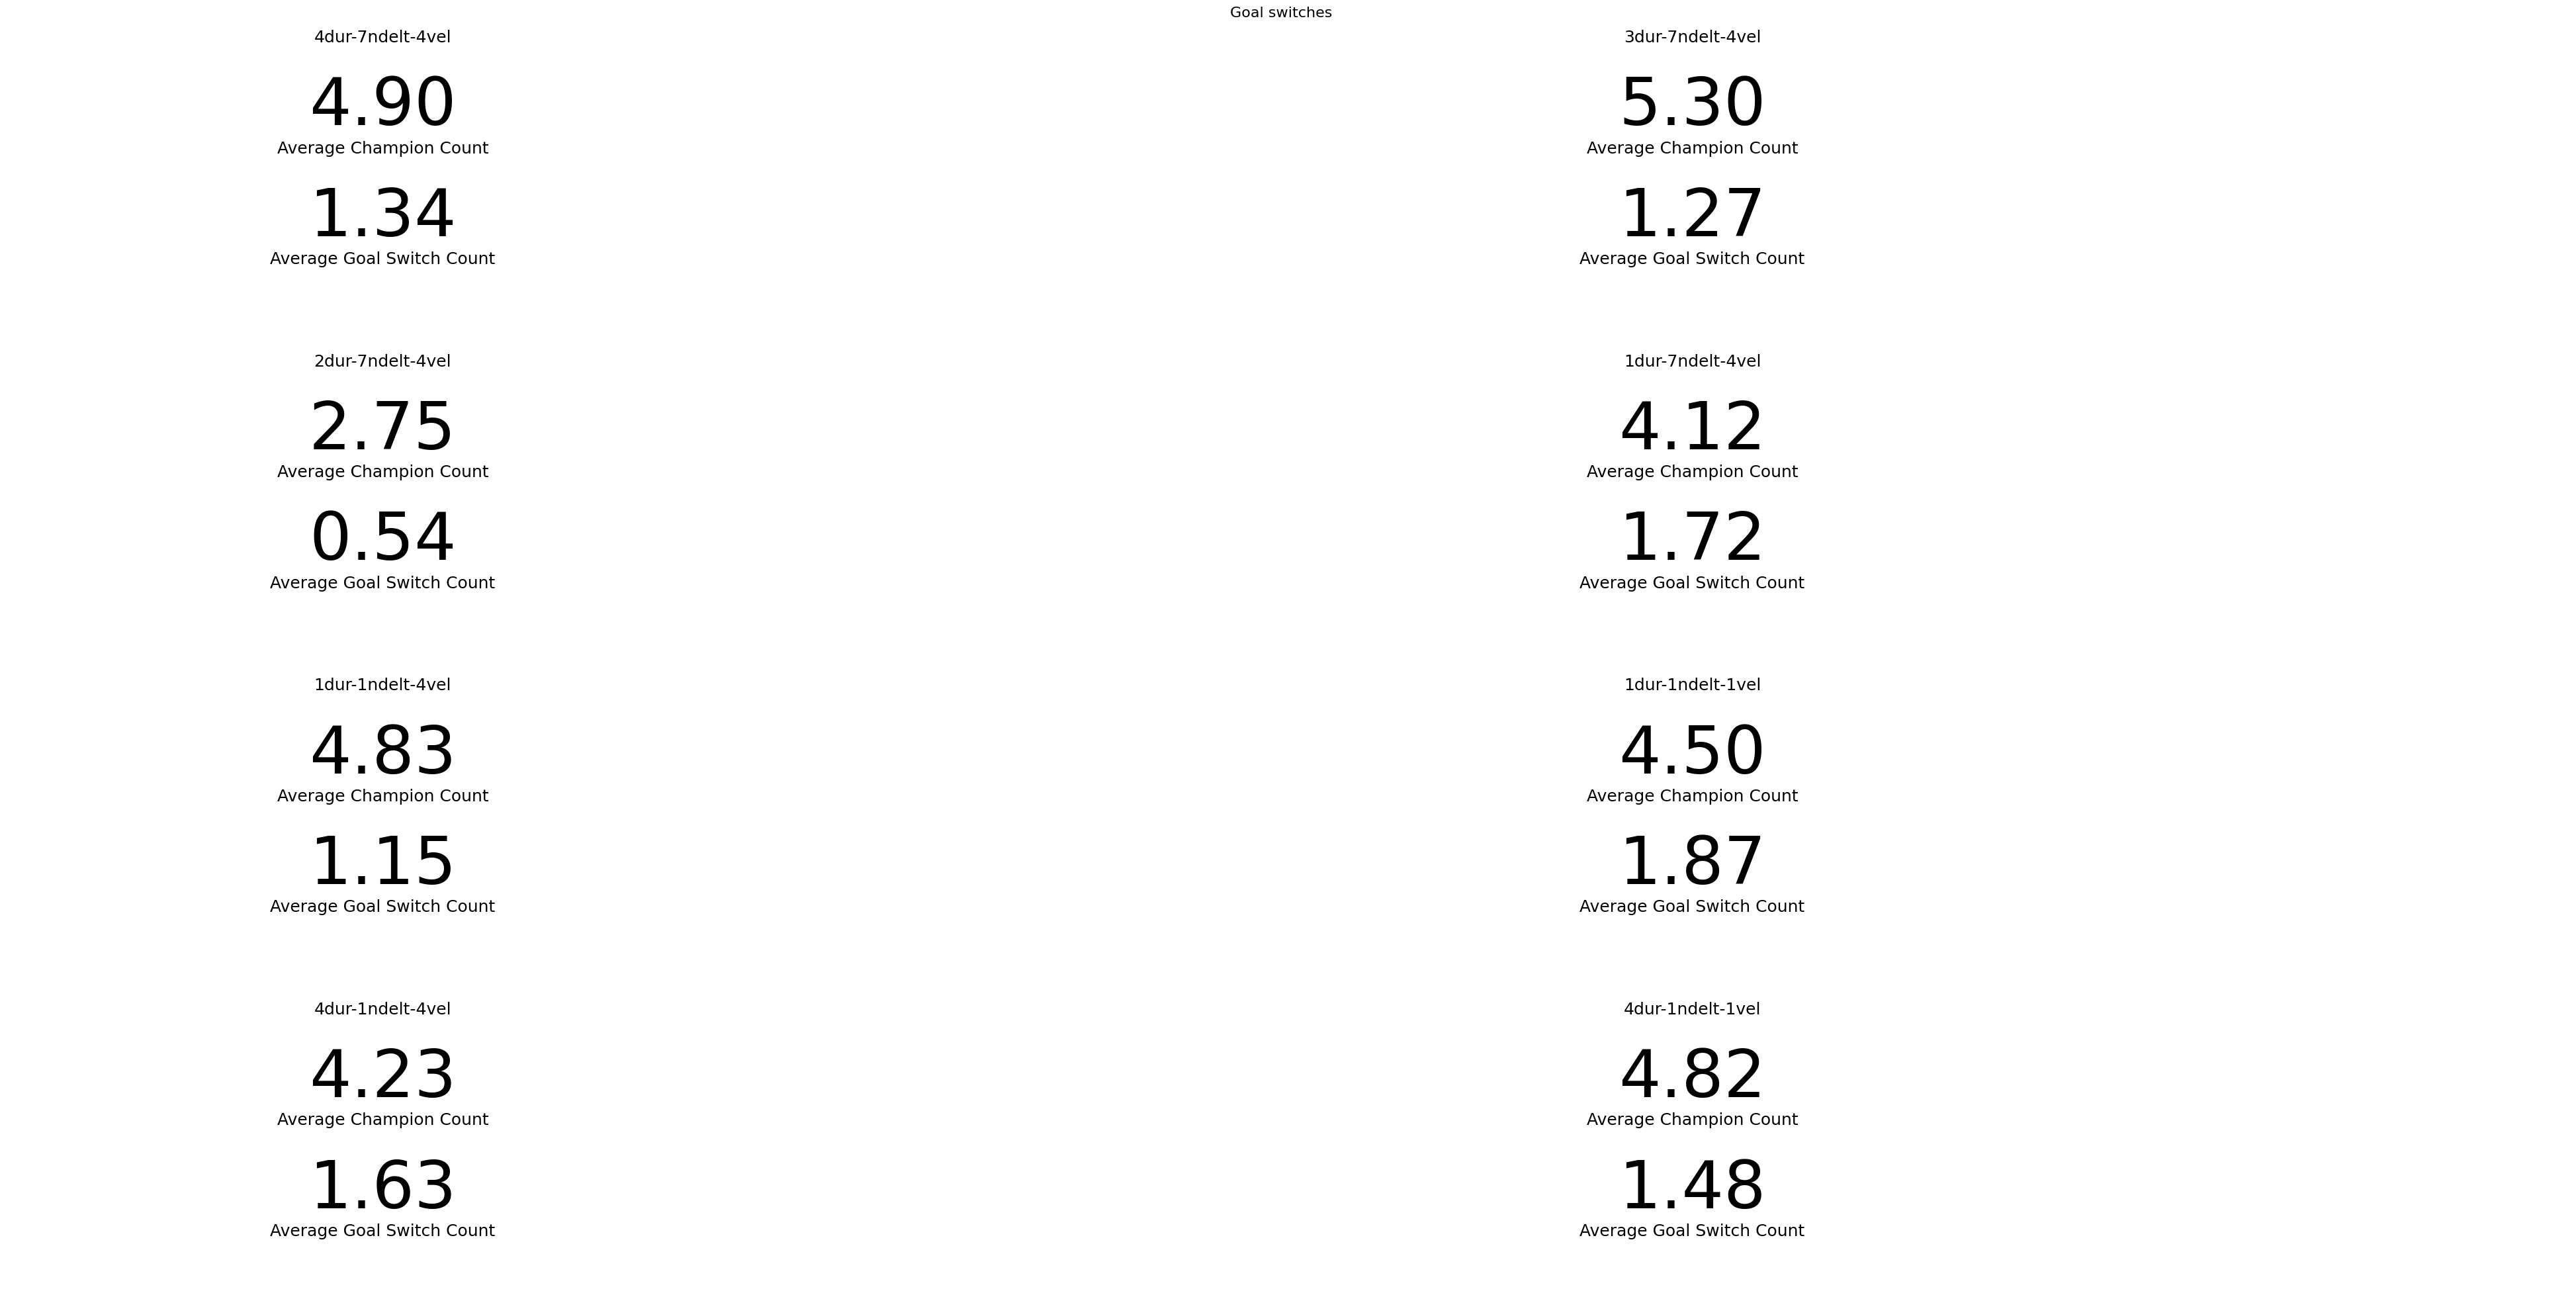

In [15]:
goal_switches_arrays = plotUtil.extract_data_arrays(data, 'goalSwitches')

def plotGoalSwitches(plt, ax, x_values, value, label):
    
    ax.text(0.3, 1.0, label, fontsize=18, ha='center', va='center')

    ax.text(0.3, 0.75, '{:.2f}'.format(value["averageChampionCount"]), fontsize=72, ha='center', va='center')
    ax.text(0.3, 0.60, "Average Champion Count", fontsize=18, ha='center', va='center', transform=ax.transAxes)

    ax.text(0.3, 0.35, '{:.2f}'.format(value["averageGoalSwitchCount"]), fontsize=72, ha='center', va='center')
    ax.text(0.3, 0.2, "Average Goal Switch Count", fontsize=18, ha='center', va='center', transform=ax.transAxes)

    ax.axis('off')  # Hide the axis

plotUtil.render_graphs(goal_switches_arrays, x_multiplier, plotGoalSwitches, 40, 20, "Goal switches")

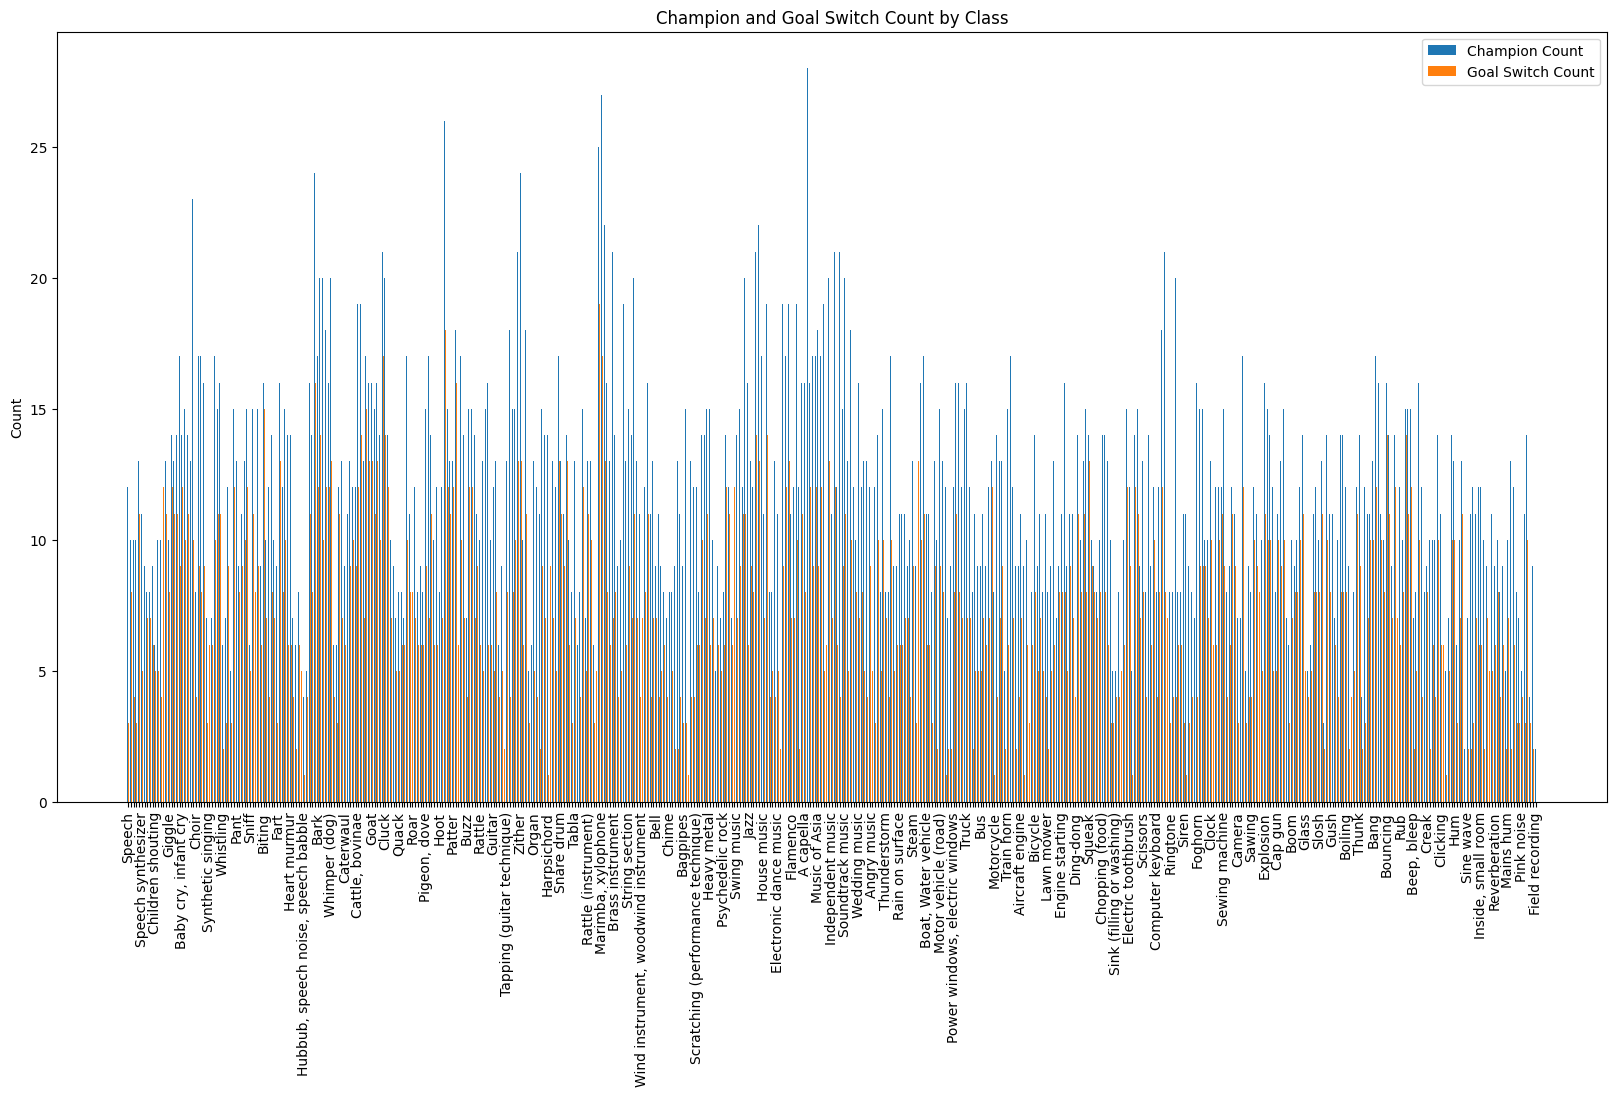

In [16]:
class_champion_and_goal_switch_count = data['evoRuns'][0]['iterations'][0]['goalSwitches']['classChampionAndGoalSwitchCount']

# Plot a histogram from class_champion_and_goal_switch_count, with two bars for each class: 
# Class labels come from the dictionary keys, and data for each class comes from the dictionary values,
# where each value is a dictionary with two keys: 'championCount' and 'goalSwitchCount'
def plot_histogram_from_dict(data_dict):
    fig, ax = plt.subplots(figsize=(20, 10))  # Adjust the figure size as per your preference

    # Set the bar width
    bar_width = 0.35

    # Set the positions of the bars on the x-axis
    x1 = [x - bar_width/2 for x in range(len(data_dict))]
    x2 = [x + bar_width/2 for x in range(len(data_dict))]

    # Plot the bars
    ax.bar(x1, [data_dict[k]['championCount'] for k in data_dict], width=bar_width, label='Champion Count')
    ax.bar(x2, [data_dict[k]['goalSwitchCount'] for k in data_dict], width=bar_width, label='Goal Switch Count')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Count')
    ax.set_title('Champion and Goal Switch Count by Class')
    ax.set_xticks([x for x in range(len(data_dict))])
    ax.set_xticklabels([k for k in data_dict])
    ax.legend()

    # rotate x-axis labels to avoid overlapping
    plt.xticks(rotation=90)
    # print only every 5th x-axis label
    for index, label in enumerate(plt.gca().xaxis.get_ticklabels()):
        if index % 5 != 0:
            label.set_visible(False)

    plt.show()

plot_histogram_from_dict(class_champion_and_goal_switch_count)


TODO: this is quite dense: which other plots might be more useful?